# **Imports**

In [2]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

# **Data**

In [3]:
root_path = '../input/rice-image-dataset/Rice_Image_Dataset/'
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [4]:
name_class = os.listdir('../input/rice-image-dataset/Rice_Image_Dataset/')
name_class

['Karacadag',
 'Basmati',
 'Jasmine',
 'Rice_Citation_Request.txt',
 'Arborio',
 'Ipsala']

In [5]:
file_path='../input/rice-image-dataset/Rice_Image_Dataset/'

In [7]:
print(filepaths[0:2])

['../input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg', '../input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg']


In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Kara

In [9]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,../input/rice-image-dataset/Rice_Image_Dataset...,Karacadag
1,../input/rice-image-dataset/Rice_Image_Dataset...,Ipsala
2,../input/rice-image-dataset/Rice_Image_Dataset...,Ipsala
3,../input/rice-image-dataset/Rice_Image_Dataset...,Basmati
4,../input/rice-image-dataset/Rice_Image_Dataset...,Ipsala


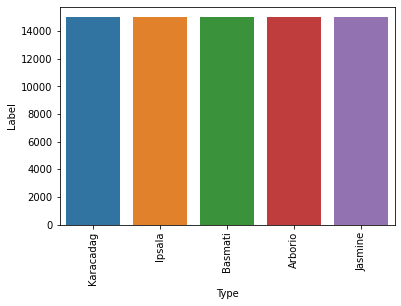

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

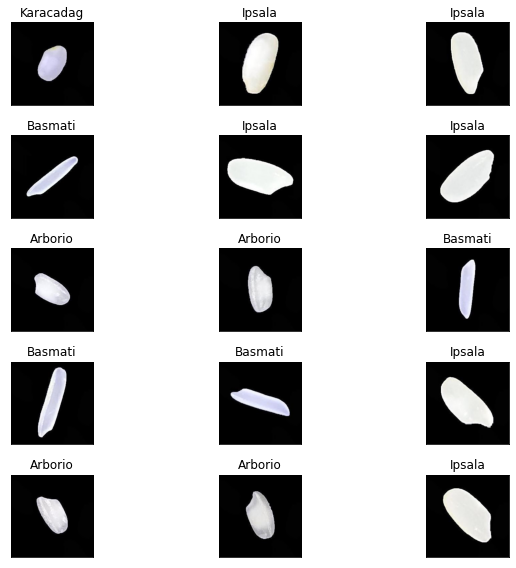

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 56250 validated image filenames belonging to 5 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

In [ ]:
model.save("model_resnet50_augmented.h5")  

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))